In [1]:
from functions import *

In [2]:
params = read_parameters()
file_idx = params['file_idx']
file_idx_uppaal = params['file_idx_uppaal']
drop_initial_final_off_rows = params['drop_initial_final_off_rows']
drop_off_rows = params['drop_off_rows']
drop_outliers = params['drop_outliers']

subfolder: UF/
file_idx_uppaal: 0
file_idx: 0
tmp_idx: 0
initial_feed_volume_L: 100
reset_columns_when_OFF: True
drop_initial_final_off_rows: True
drop_off_rows: True
drop_outliers: True
plot_scatterplot_matrix: False
use_default_arima_params: True
default_arima_params: [1, 1, 0]
include_arima_simulations_in_analysis: True


In [3]:
# TODO
file_idx=5
file_idx_uppaal=0

In [4]:
in_folder = PATH_SENSORS_DATA_EXT_UF_V1
in_files = [ (in_folder, file) for file in os.listdir(in_folder) if re.match(".*\.csv", file) ]

cur_file = in_files[file_idx][1]
file_path = in_folder + cur_file

print("file list:")
for i in range(len(in_files)) :
    print(i, in_files[i][0] + in_files[i][1])
print(f"\ninput file:\n{file_path}")

file list:
0 /workspaces/data_analysis/data/from_sensors/1_extended/UF/v1/2023-11-08 0 clean water.csv
1 /workspaces/data_analysis/data/from_sensors/1_extended/UF/v1/2023-11-09 0 clean water.csv
2 /workspaces/data_analysis/data/from_sensors/1_extended/UF/v1/2023-11-09 1 dirty water.csv
3 /workspaces/data_analysis/data/from_sensors/1_extended/UF/v1/2023-11-09 2 dirty water.csv
4 /workspaces/data_analysis/data/from_sensors/1_extended/UF/v1/2023-11-09 3 dirty water.csv
5 /workspaces/data_analysis/data/from_sensors/1_extended/UF/v1/ALL_DATA.csv

input file:
/workspaces/data_analysis/data/from_sensors/1_extended/UF/v1/ALL_DATA.csv


In [5]:
df_sensors = pd.read_csv(file_path)
df_sensors['datetime'] = pd.to_datetime(df_sensors['datetime'], format='%Y-%m-%d %H:%M:%S')
df_sensors['date'] = pd.to_datetime(df_sensors['datetime']).apply(lambda x : x.date())
df_sensors = df_sensors.reset_index()
df_sensors = drop_all_outliers(df_sensors, drop_initial_final_off_rows=drop_initial_final_off_rows, drop_off_rows=drop_off_rows, drop_outliers=drop_outliers, log=True)
df_sensors = df_sensors[df_sensors['initial feed concentration [g/L]'] > 0]
df_sensors['time [m]'] = range(1, len(df_sensors)+1)
df_sensors = df_sensors[change_column_index(df_sensors.columns.tolist(), 'time [m]', 5)]
cur_TMP=330
df_sensors[f'flux at 20° TMP={cur_TMP} [L/m^2h]'] = df_sensors['flux at 20° [L/m^2h]'] * (cur_TMP / df_sensors['TMP [kPa]'])

removed 0 initial rows
removed 0 final rows
 - dropped rows: 0
removing outliers rows of column: res tot [1/m]
 - dropped rows: 0
removing outliers rows of column: prs feed_2 [kPa]
 - dropped rows: 0
removing outliers rows of column: flux [L/m^2h]
 - dropped rows: 0
removing outliers rows of column: flux [L/m^2h]
 - dropped rows: 0


In [6]:
in_folder = PATH_UPPAAL_DATA_EXT
in_files = [ (in_folder, file) for file in os.listdir(in_folder) if re.match(".*\.csv", file) ]

cur_file = in_files[file_idx_uppaal][1]
file_path = in_folder + cur_file

print("file list:")
for i in range(len(in_files)) :
    print(i, in_files[i][0] + in_files[i][1])
print(f"\ninput file:\n{file_path}")

file list:
0 /workspaces/data_analysis/data/from_uppaal/2_extended/k_n=5.5e-6,n=0,flux_min=res,res_0=4e12.csv
1 /workspaces/data_analysis/data/from_uppaal/2_extended/k_n=5e-6,n=0,flux_min=res,res_0=3.3e12.csv
2 /workspaces/data_analysis/data/from_uppaal/2_extended/k_n=5e-6,n=0,flux_min=res,res_0=4e12.csv
3 /workspaces/data_analysis/data/from_uppaal/2_extended/k_n=5e-6,n=0,flux_min=res.csv
4 /workspaces/data_analysis/data/from_uppaal/2_extended/k_n=5e-6,n=0.csv
5 /workspaces/data_analysis/data/from_uppaal/2_extended/k_n=6e-6,n=0,flux_min=res,res_0=3.8e12.csv

input file:
/workspaces/data_analysis/data/from_uppaal/2_extended/k_n=5.5e-6,n=0,flux_min=res,res_0=4e12.csv


In [7]:
df_uppaal = pd.read_csv(file_path)

In [8]:
TIME_IDX  = ROW_IDX_AS_TIME
x_ax_lbl = 'time [m]' if TIME_IDX == ROW_IDX_AS_TIME else x_axis[TIME_IDX]

In [9]:
conc_lines, conc_lines_GREATER_ZERO = get_concentration_lines(df_sensors, time_col='index')

 236: feed conc = 0.49 [g/L]
 288: feed conc = 1.30 [g/L]
 315: feed conc = 1.71 [g/L]


In [10]:
CONST_TEMPERATURE = (df_uppaal['is temperature fixed'].dropna().iloc[0] == 1.0)
TEMPERATURE = int(df_uppaal['temperature [°C]'].dropna().iloc[0])
FLUX_COL = f'flux at {TEMPERATURE}° [L/m^2h]' if CONST_TEMPERATURE else 'flux [L/m^2h]'
FLUX_USED = FLUX_COL[:-9]
FLUX_MIN_COL = f'{FLUX_USED} min [L/m^2h]'
print(FLUX_COL)
print(FLUX_USED)

flux at 20° [L/m^2h]
flux at 20°


   1: feed conc = 0.49 [g/L]
  53: feed conc = 1.30 [g/L]
  80: feed conc = 1.71 [g/L]


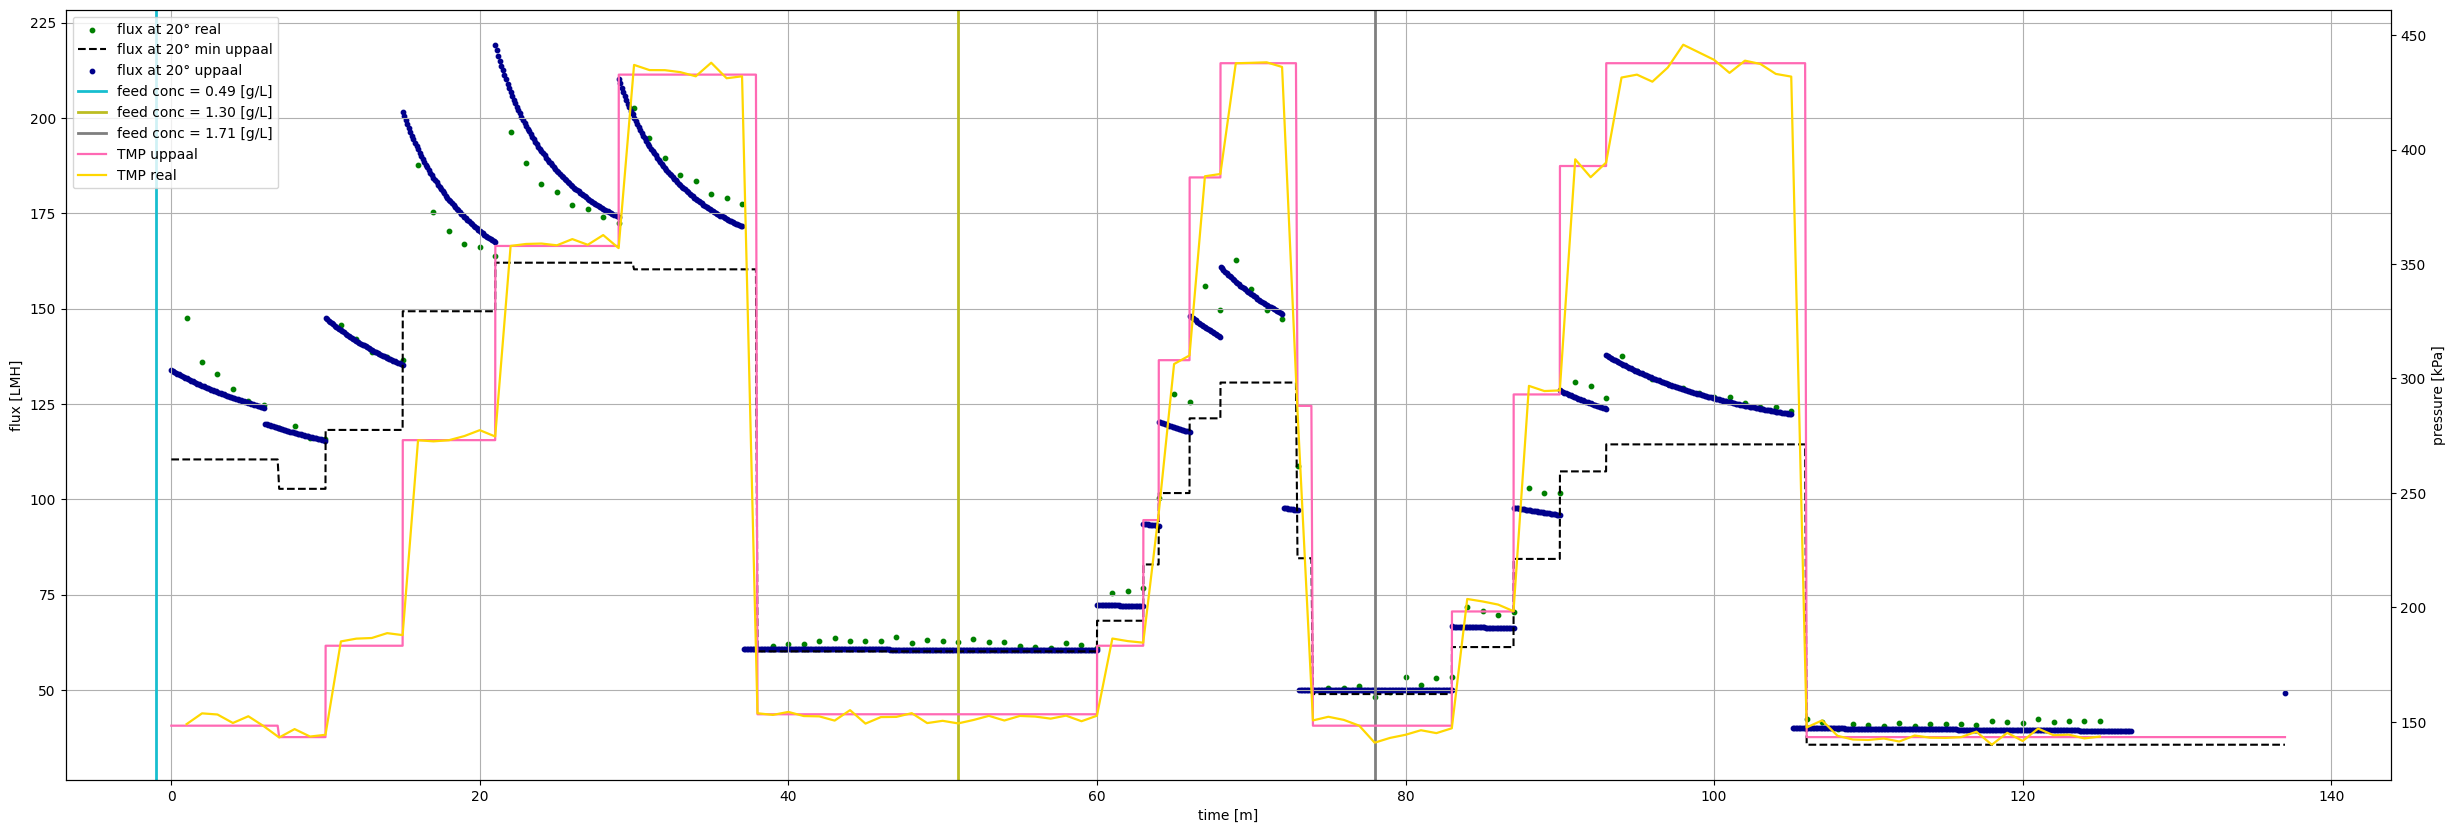

In [11]:
fig, ax1 = plot.subplots(figsize=(30,10))
ax2 = ax1.twinx()

#if INITIAL_ADDED :
#    ax1.scatter(df_init['time [m]'],  df_init[FLUX_COL],  color='black', marker='o', s=10, label=f'{FLUX_USED} initial')
ax1.scatter(df_sensors['time [m]'],  df_sensors[FLUX_COL],                   color='green', marker='o', s=10, label=f'{FLUX_USED} real')
#ax1.scatter(df_frcst['time [m]'], df_frcst[FLUX_COL],                  color='goldenrod',  marker='o', s=10, label=f'{FLUX_USED} ARIMA forecast')
#ax1.plot(   df_frcst['time [m]'],       df_frcst[FLUX_MIN_COL],                color='mediumblue',  marker='o', markersize=0, lw=1.6, label=f'{FLUX_USED} min using ARIMA forecast', linestyle='dotted')
ax1.plot(   df_uppaal['time [m]'],       df_uppaal['flux at 20° min [L/m^2h]'],    color='black',        marker='o', markersize=0, lw=1.5, label=f'{FLUX_USED} min uppaal', linestyle='dashed')
ax1.scatter(df_uppaal['time [m]'],   df_uppaal[FLUX_COL],                 color='darkblue',   marker='o', s=10, label=f'{FLUX_USED} uppaal')
ax2.plot(   df_uppaal['time [m]'],       df_uppaal['TMP [kPa]'],             color='hotpink',   marker='o', markersize=0, lw=1.6, label='TMP uppaal')
ax2.plot(   df_sensors['time [m]'],       df_sensors['TMP [kPa]'],             color='gold',   marker='o', markersize=0, lw=1.6, label='TMP real')

conc_lines, conc_lines_GREATER_ZERO = get_concentration_lines(df_sensors, time_col='time [m]')
i = len(COLOR_CYCLE) - 1
for (line_x,lbl) in conc_lines.items() :
    ax1.axvline(x=line_x-2, label=lbl, color=COLOR_CYCLE[i], linewidth=2)
    i -= 1
    
ax1.set_xlabel("time [m]")
ax1.set_ylabel("flux [LMH]")
ax2.set_ylabel("pressure [kPa]")

ax1.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

   1: feed conc = 0.49 [g/L]
  53: feed conc = 1.30 [g/L]
  80: feed conc = 1.71 [g/L]


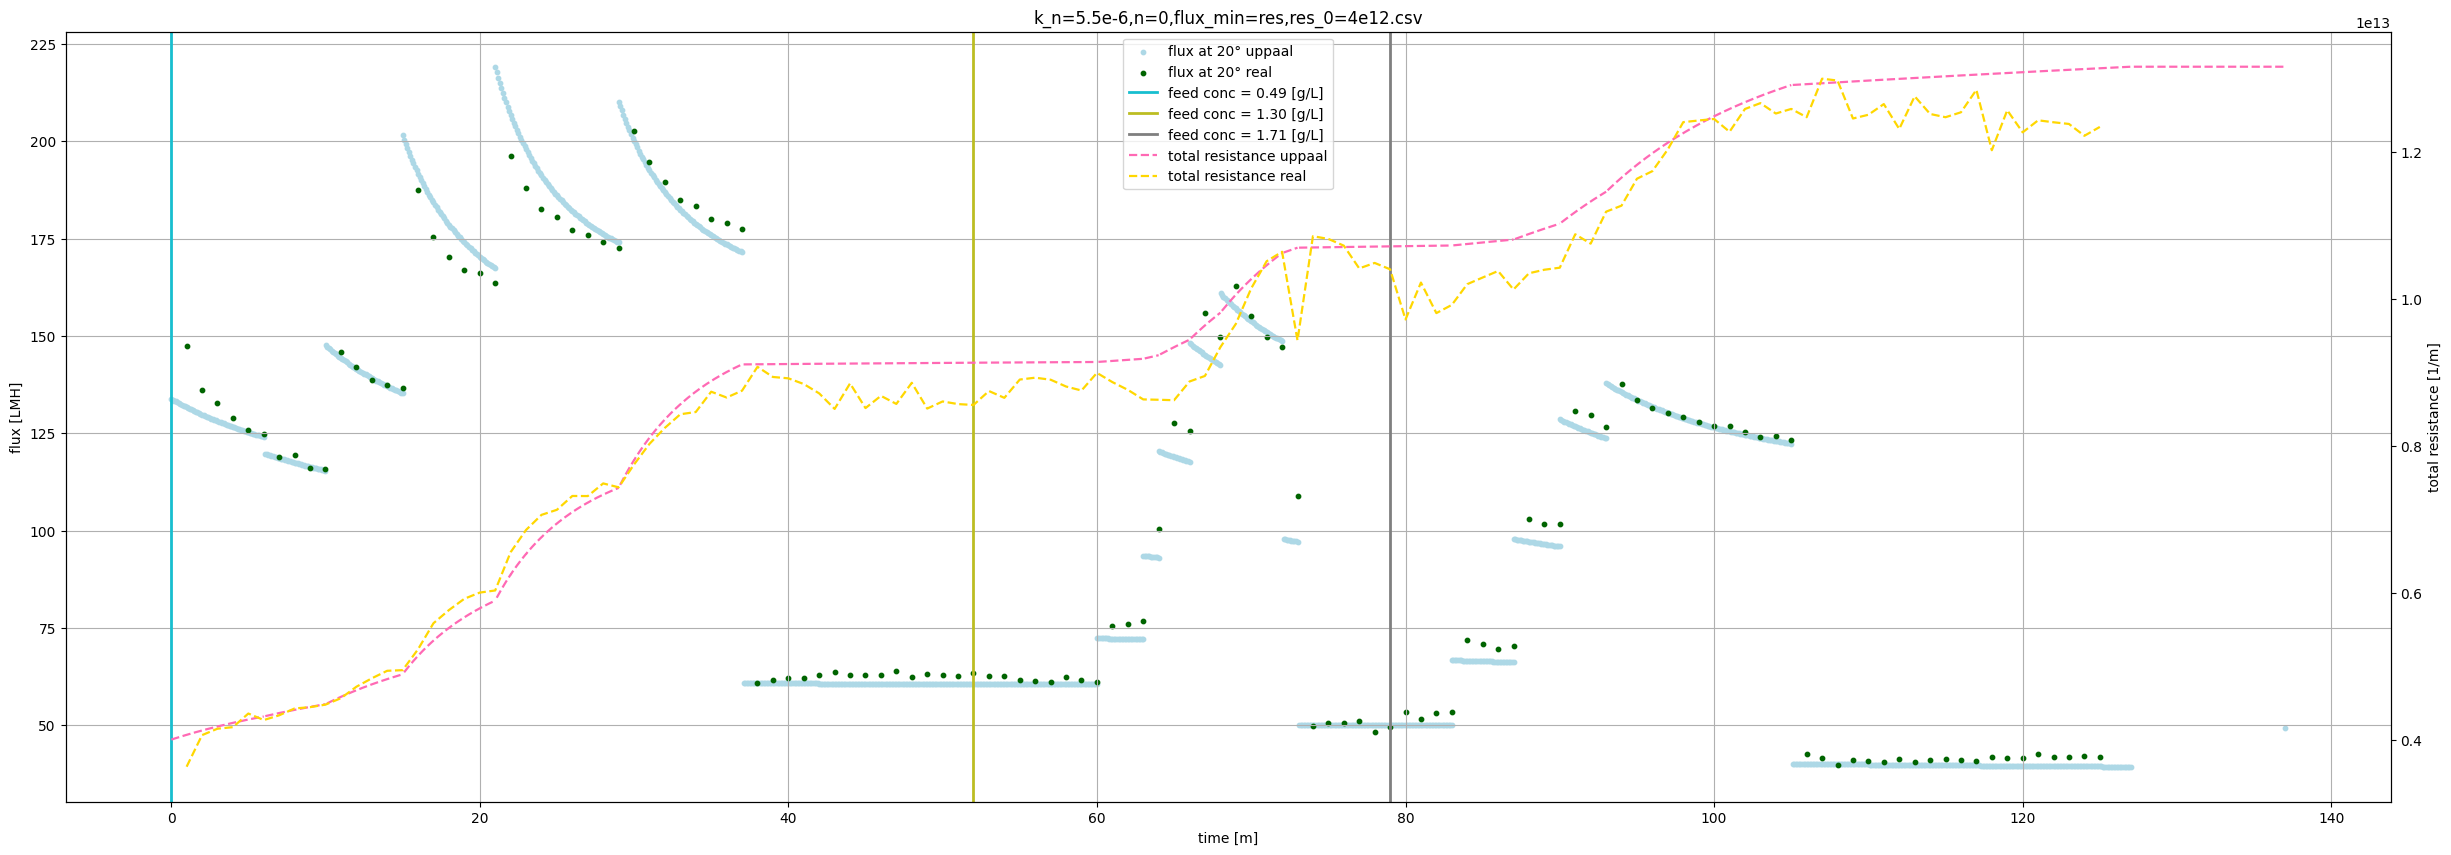

In [18]:
fig, ax1 = plot.subplots(figsize=(30,10))
ax2 = ax1.twinx()

#if INITIAL_ADDED :
#    ax1.scatter(df_init['time [m]'],  df_init[FLUX_COL],  color='black', marker='o', s=10, label=f'{FLUX_USED} initial')
#ax1.scatter(df_frcst['time [m]'], df_frcst[FLUX_COL],                  color='goldenrod',  marker='o', s=10, label=f'{FLUX_USED} ARIMA forecast')
#ax1.plot(   df_frcst['time [m]'],       df_frcst[FLUX_MIN_COL],                color='mediumblue',  marker='o', markersize=0, lw=1.6, label=f'{FLUX_USED} min using ARIMA forecast', linestyle='dotted')
# ax1.plot(   df_uppaal['time [m]'],       df_uppaal['flux at 20° min [L/m^2h]'],    color='black',        marker='o', markersize=0, lw=1.5, label=f'{FLUX_USED} min uppaal', linestyle='dashed')
ax1.scatter(df_uppaal['time [m]'],   df_uppaal[FLUX_COL],                 color='lightblue',   marker='o', s=10, label=f'{FLUX_USED} uppaal')
ax2.plot(   df_uppaal['time [m]'],       df_uppaal['res tot [1/m]'],             color='hotpink',   marker='o', markersize=0, lw=1.6, label='total resistance uppaal', linestyle='dashed')
ax1.scatter(df_sensors['time [m]'],  df_sensors[FLUX_COL],                   color='darkgreen', marker='o', s=10, label=f'{FLUX_USED} real')
ax2.plot(   df_sensors['time [m]'],       df_sensors['res tot [1/m]'],             color='gold',   marker='o', markersize=0, lw=1.6, label='total resistance real', linestyle='dashed')

conc_lines, conc_lines_GREATER_ZERO = get_concentration_lines(df_sensors, time_col='time [m]')
i = len(COLOR_CYCLE) - 1
for (line_x,lbl) in conc_lines.items() :
    ax1.axvline(x=line_x-1, label=lbl, color=COLOR_CYCLE[i], linewidth=2)
    i -= 1

ax1.set_title(cur_file)

ax1.set_xlabel("time [m]")
ax1.set_ylabel("flux [LMH]")
ax2.set_ylabel("total resistance [1/m]")

ax1.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper center')

In [13]:
MAX_TIME = df_sensors['time [m]'].max()

In [14]:
# keep only non-na rows at integers time values
df_uppaal_eval = df_uppaal.dropna(subset=[FLUX_COL])
df_uppaal_eval = df_uppaal_eval[df_uppaal_eval['time [m]'] - df_uppaal_eval['time [m]'].astype(int) < 0.0001]
df_uppaal_eval = df_uppaal_eval[df_uppaal_eval['time [m]'] <= MAX_TIME]

In [15]:
y_col = FLUX_COL
y = df_sensors[FLUX_COL].dropna().reset_index(drop=True)
y_pred = df_uppaal_eval[FLUX_COL].dropna().reset_index(drop=True)
print(cur_file)
print(get_error_stats(y, y_pred, y_col))
print()
compute_error_metrics(y, y_pred)
print()

k_n=5.5e-6,n=0,flux_min=res,res_0=4e12.csv
        flux at 20° [L/m^2h]  absolute error  relative error  squared error
min                39.858642        0.050650        0.000379       0.002565
median            101.780048        2.163887        0.028426       4.682407
mean              102.684133        2.939738        0.030843      16.395393
max               202.711191       15.806610        0.107169     249.848909
var              2590.124116        7.815864        0.000515    1067.148729
std                50.893262        2.795687        0.022701      32.667242

Error metrics:
R^2      0.9936
RMSE     4.0491
MAE      2.9397
MedAE    2.1639
maxAE   15.8066
MAPE     0.0308
maxAPE   0.1072



k_n=5.5e-6,n=0,flux_min=res,res_0=4e12.csv
        flux at 20° [L/m^2h]  absolute error  relative error  squared error
min                39.858642        0.050650        0.000379       0.002565
median            101.780048        2.163887        0.028426       4.682407
mean              102.684133        2.939738        0.030843      16.395393
max               202.711191       15.806610        0.107169     249.848909
var              2590.124116        7.815864        0.000515    1067.148729
std                50.893262        2.795687        0.022701      32.667242

Error metrics:
R^2      0.9936
RMSE     4.0491
MAE      2.9397
MedAE    2.1639
maxAE   15.8066
MAPE     0.0308
maxAPE   0.1072

k_n=6e-6,n=0,flux_min=res,res_0=3.8e12.csv
        flux at 20° [L/m^2h]  absolute error  relative error  squared error
min                39.858642        0.182917        0.001060       0.033459
median            101.780048        3.266903        0.041458      10.672657
mean              102.684133        3.966747        0.043425      22.686163
max               202.711191       13.422590        0.123347     180.165934
var              2590.124116        7.007140        0.000600     960.258069
std                50.893262        2.647100        0.024504      30.988031

Error metrics:
R^2      0.9912
RMSE     4.7630
MAE      3.9667
MedAE    3.2669
maxAE   13.4226
MAPE     0.0434
maxAPE   0.1233

k_n=5e-6,n=0,flux_min=res.csv
        flux at 20° [L/m^2h]  absolute error  relative error  squared error
min                39.858642        0.000108        0.000003   1.165964e-08
median            101.780048        1.943321        0.025099   3.776496e+00
mean              102.684133        4.044762        0.032234   3.844139e+01
max               202.711191       20.225772        0.109060   4.090818e+02
var              2590.124116       22.259366        0.000727   6.211952e+03
std                50.893262        4.717983        0.026957   7.881594e+01

Error metrics:
R^2      0.9850
RMSE     6.2001
MAE      4.0448
MedAE    1.9433
maxAE   20.2258
MAPE     0.0322
maxAPE   0.1091


k_n=5e-6,n=0,flux_min=res.csv
        flux at 20° [L/m^2h]  absolute error  relative error  squared error
min                39.858642        0.000108        0.000003   1.165964e-08
median            101.780048        1.943321        0.025099   3.776496e+00
mean              102.684133        4.044762        0.032234   3.844139e+01
max               202.711191       20.225772        0.109060   4.090818e+02
var              2590.124116       22.259366        0.000727   6.211952e+03
std                50.893262        4.717983        0.026957   7.881594e+01

Error metrics:
R^2      0.9850
RMSE     6.2001
MAE      4.0448
MedAE    1.9433
maxAE   20.2258
MAPE     0.0322
maxAPE   0.1091


k_n=5e-6,n=0.csv
        flux at 20° [L/m^2h]  absolute error  relative error  squared error
min                39.858642        0.006800        0.000138       0.000046
median            101.780048        3.396979        0.041018      11.539465
mean              102.684133        4.743525        0.043733      42.378094
max               202.711191       20.679928        0.118408     427.659428
var              2590.124116       20.037359        0.000737    6077.409602
std                50.893262        4.476311        0.027155      77.957742

Error metrics:
R^2      0.9835
RMSE     6.5098
MAE      4.7435
MedAE    3.3970
maxAE   20.6799
MAPE     0.0437
maxAPE   0.1184